
# Exploratory Data Analysis
This notebook documents the exploratory data analysis (EDA) for the health risk prediction project.
I inspect the cleaned dataset, quantify data quality, and generate visuals saved to the shared results folders.


## Setup

In [1]:

from pathlib import Path
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-v0_8')
sns.set_theme(style='whitegrid')

DATA_PATH = Path('../data/processed/health_clean.csv')
PLOTS_DIR = Path('../results/plots')
METRICS_DIR = Path('../results/metrics')
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
METRICS_DIR.mkdir(parents=True, exist_ok=True)
TARGET_COLUMN = 'hltprhc'

print(f'Using dataset: {DATA_PATH.resolve()}')


Using dataset: /Users/peter/Desktop/AI_MLProjects_Research_Project/health_xai_project/data/processed/health_clean.csv


### Load Cleaned Dataset

In [2]:

df = pd.read_csv(DATA_PATH)
row_count, col_count = df.shape
print(f'Rows: {row_count} | Columns: {col_count}')
df.head()


Rows: 42377 | Columns: 52


,numeric__happy,numeric__sclmeet,numeric__inprdsc,numeric__health,numeric__ctrlife,numeric__etfruit,numeric__eatveg,numeric__dosprt,numeric__cgtsmok,numeric__alcfreq,...,categorical__cntry_ME,categorical__cntry_NL,categorical__cntry_NO,categorical__cntry_PL,categorical__cntry_PT,categorical__cntry_RS,categorical__cntry_SE,categorical__cntry_SI,categorical__cntry_SK,hltprhc
0,0.331736,-0.492173,-1.207632,0.941055,0.310350,-0.171578,-0.141590,-0.060955,-0.190468,-0.794977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.875429,1.399912,0.901529,-0.162242,0.310350,-1.701573,-1.940678,0.711905,0.356521,-0.794977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.875429,-0.492173,0.901529,-1.265539,0.804231,0.593419,-0.141590,-0.060955,-1.831432,-0.305757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.211956,0.769217,0.198475,0.941055,0.310350,-0.936576,-1.041134,-0.060955,0.903509,1.161905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.875429,0.138522,0.901529,-0.162242,0.804231,-0.171578,-0.141590,-0.060955,-1.831432,-1.284198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Dataset Overview

In [3]:

buffer = io.StringIO()
df.info(buf=buffer)
info_text = buffer.getvalue()
print(info_text)

numeric_desc = df.describe().T
display(numeric_desc)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if categorical_cols:
    categorical_desc = df[categorical_cols].describe().T
    display(categorical_desc)
else:
    print('No categorical columns detected.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42377 entries, 0 to 42376
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   numeric__happy         42377 non-null  float64
 1   numeric__sclmeet       42377 non-null  float64
 2   numeric__inprdsc       42377 non-null  float64
 3   numeric__health        42377 non-null  float64
 4   numeric__ctrlife       42377 non-null  float64
 5   numeric__etfruit       42377 non-null  float64
 6   numeric__eatveg        42377 non-null  float64
 7   numeric__dosprt        42377 non-null  float64
 8   numeric__cgtsmok       42377 non-null  float64
 9   numeric__alcfreq       42377 non-null  float64
 10  numeric__height        42377 non-null  float64
 11  numeric__weighta       42377 non-null  float64
 12  numeric__fltdpr        42377 non-null  float64
 13  numeric__flteeff       42377 non-null  float64
 14  numeric__slprl         42377 non-null  float64
 15  nu

,count,mean,std,min,25%,50%,75%,max
numeric__happy,42377.0,0.003509,0.998148,-4.017806,-0.211956,0.331736,0.875429,1.419122
numeric__sclmeet,42377.0,0.003831,0.996196,-2.384258,-0.492173,0.138522,0.769217,1.399912
numeric__inprdsc,42377.0,0.002890,0.999787,-1.910686,-0.504579,0.198475,0.901529,2.307637
numeric__health,42377.0,-0.002776,0.998264,-1.265539,-1.265539,-0.162242,0.941055,3.147650
numeric__ctrlife,42377.0,0.002230,0.997877,-3.640690,-0.677410,0.310350,0.804231,1.298111
numeric__etfruit,42377.0,-0.002989,1.001647,-1.701573,-0.936576,-0.171578,0.593419,2.888412
numeric__eatveg,42377.0,-0.002233,0.999703,-1.940678,-1.041134,-0.141590,0.757955,3.456588
numeric__dosprt,42377.0,-0.000406,0.998886,-1.220245,-1.220245,-0.060955,0.711905,1.484766
numeric__cgtsmok,42377.0,-0.000170,1.001922,-1.831432,-0.737456,0.356521,0.903509,0.903509
numeric__alcfreq,42377.0,0.005921,0.999813,-1.773418,-0.794977,0.183464,1.161905,1.161905


No categorical columns detected.


### Checking Missing Values

In [4]:

missing_counts = df.isna().sum().sort_values(ascending=False)
missing_df = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_pct': (missing_counts / row_count * 100).round(2)
})
display(missing_df)
missing_df.to_csv(METRICS_DIR / 'missing_values_summary.csv')


,missing_count,missing_pct
numeric__happy,0,0.0
numeric__sclmeet,0,0.0
categorical__cntry_DE,0,0.0
categorical__cntry_ES,0,0.0
categorical__cntry_FI,0,0.0
categorical__cntry_FR,0,0.0
categorical__cntry_GB,0,0.0
categorical__cntry_GR,0,0.0
categorical__cntry_HR,0,0.0
categorical__cntry_HU,0,0.0


### Missing Value Heatmap

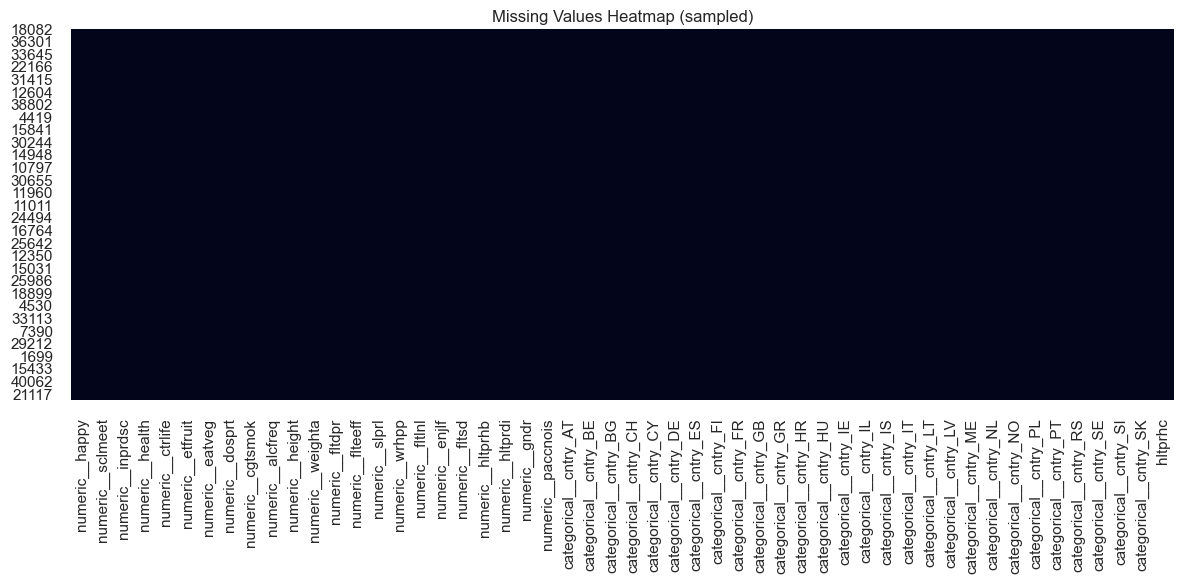

In [5]:

sample_size = min(1000, len(df))
subset = df.sample(n=sample_size, random_state=42) if len(df) > sample_size else df.copy()
plt.figure(figsize=(12, 6))
sns.heatmap(subset.isna(), cbar=False)
plt.title('Missing Values Heatmap (sampled)' if len(df) > sample_size else 'Missing Values Heatmap')
heatmap_path = PLOTS_DIR / 'missing_values_heatmap.png'
plt.tight_layout()
plt.savefig(heatmap_path)
plt.show()


### Target Distribution (hltprhc)

,count,percentage
hltprhc,,
0,37582,88.68
1,4795,11.32


/var/folders/n7/xdcht4j57pb8lxj2cl5f_c500000gn/T/ipykernel_36295/1455190147.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_balance_df.index.astype(str), y='count', data=class_balance_df.reset_index(drop=True), palette='pastel')


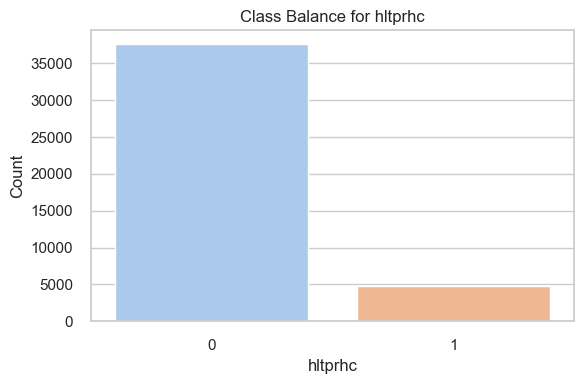

In [6]:

target_counts = df[TARGET_COLUMN].value_counts().sort_index()
target_pct = (target_counts / row_count * 100).round(2)
class_balance_df = pd.DataFrame({'count': target_counts, 'percentage': target_pct})
display(class_balance_df)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_balance_df.index.astype(str), y='count', data=class_balance_df.reset_index(drop=True), palette='pastel')
plt.title('Class Balance for hltprhc')
plt.xlabel('hltprhc')
plt.ylabel('Count')
plt.tight_layout()
class_balance_path = PLOTS_DIR / 'class_balance.png'
plt.savefig(class_balance_path)
plt.show()


### Numeric Variable Distributions

Numeric features (51): ['numeric__happy', 'numeric__sclmeet', 'numeric__inprdsc', 'numeric__health', 'numeric__ctrlife', 'numeric__etfruit', 'numeric__eatveg', 'numeric__dosprt', 'numeric__cgtsmok', 'numeric__alcfreq', 'numeric__height', 'numeric__weighta', 'numeric__fltdpr', 'numeric__flteeff', 'numeric__slprl', 'numeric__wrhpp', 'numeric__fltlnl', 'numeric__enjlf', 'numeric__fltsd', 'numeric__hltprhb', 'numeric__hltprdi', 'numeric__gndr', 'numeric__paccnois', 'categorical__cntry_AT', 'categorical__cntry_BE', 'categorical__cntry_BG', 'categorical__cntry_CH', 'categorical__cntry_CY', 'categorical__cntry_DE', 'categorical__cntry_ES', 'categorical__cntry_FI', 'categorical__cntry_FR', 'categorical__cntry_GB', 'categorical__cntry_GR', 'categorical__cntry_HR', 'categorical__cntry_HU', 'categorical__cntry_IE', 'categorical__cntry_IL', 'categorical__cntry_IS', 'categorical__cntry_IT', 'categorical__cntry_LT', 'categorical__cntry_LV', 'categorical__cntry_ME', 'categorical__cntry_NL', 'categori

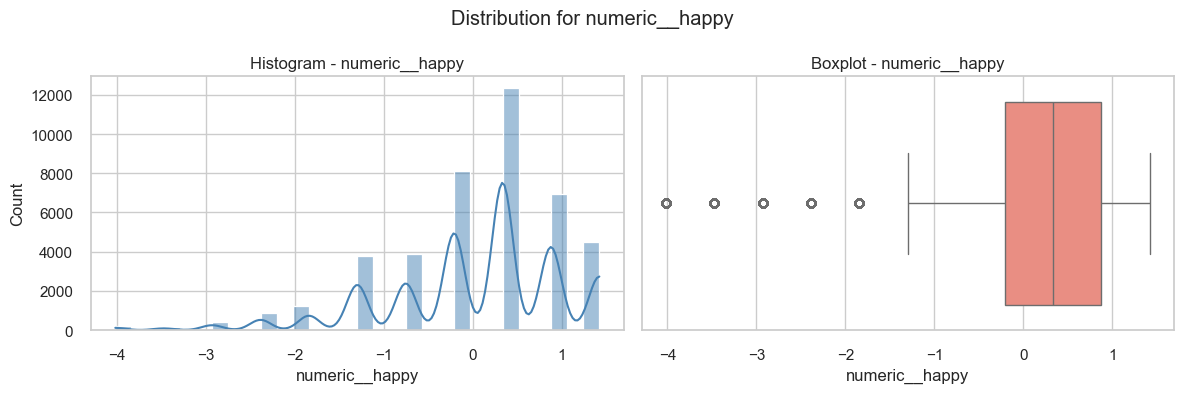

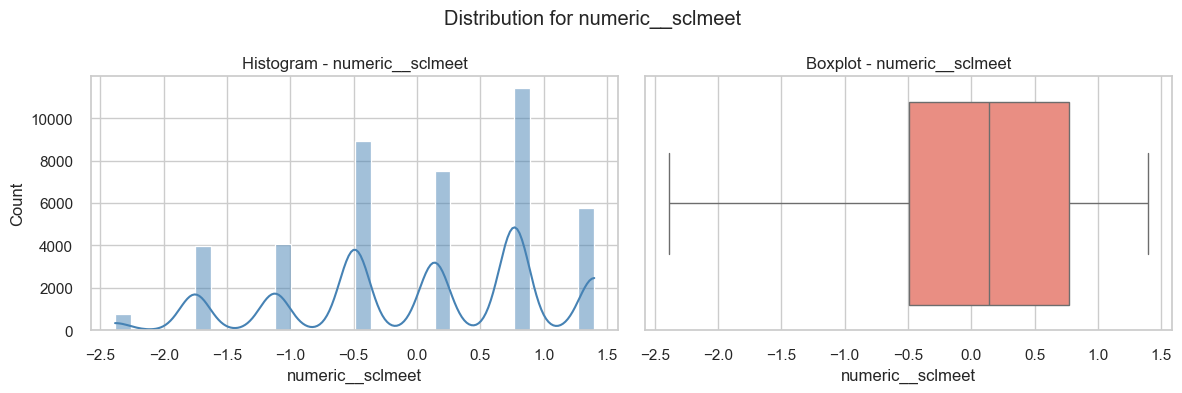

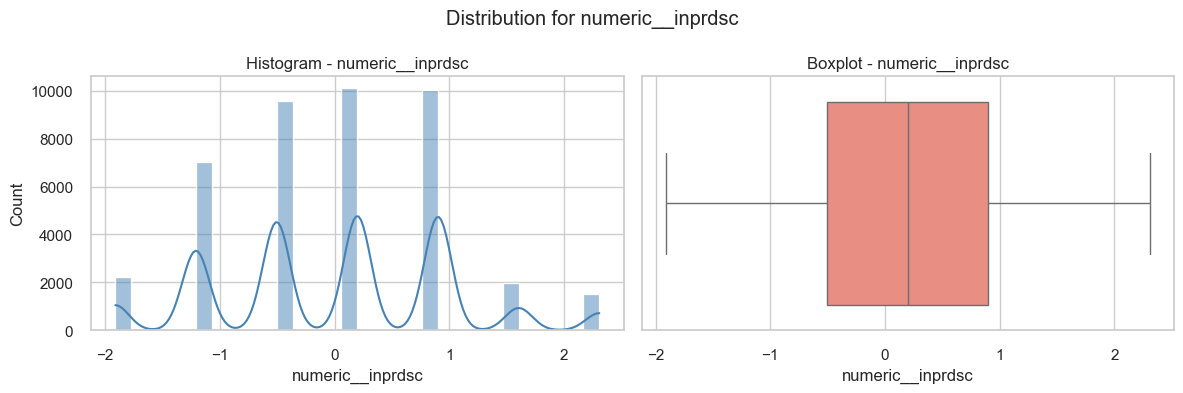

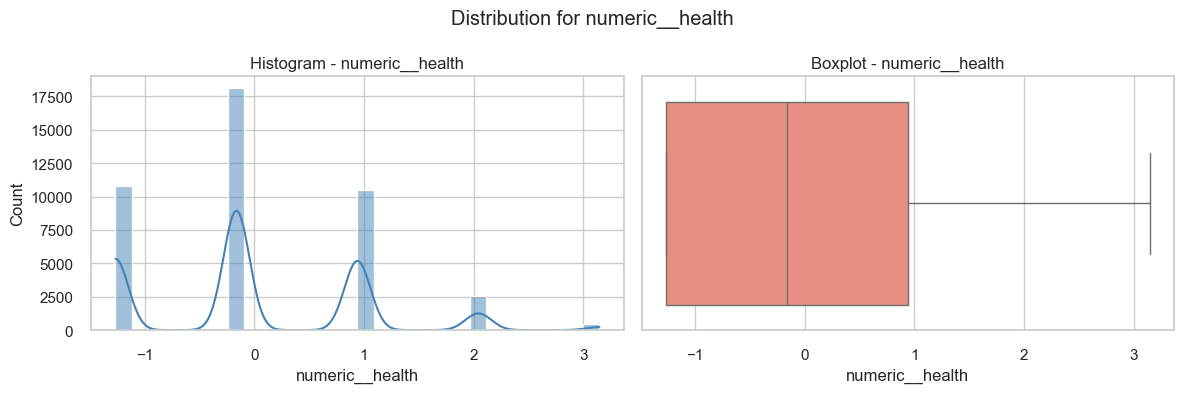

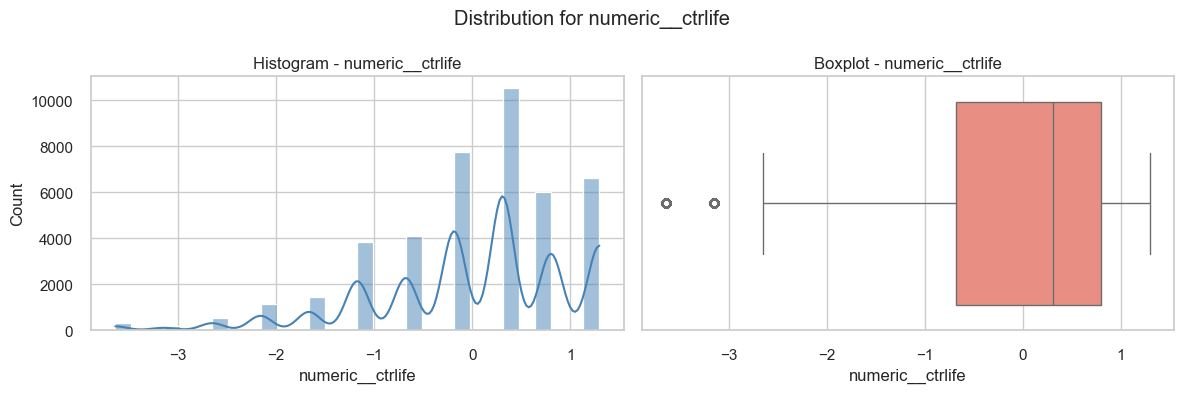

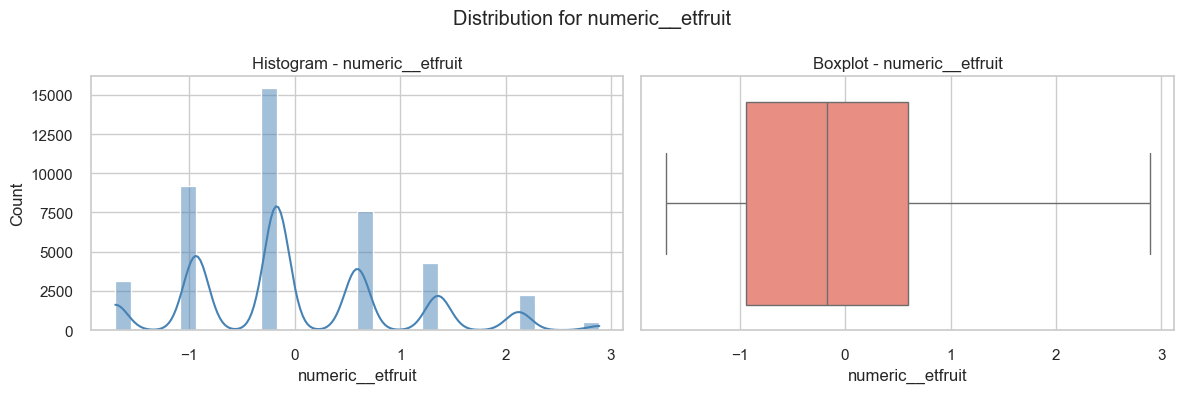

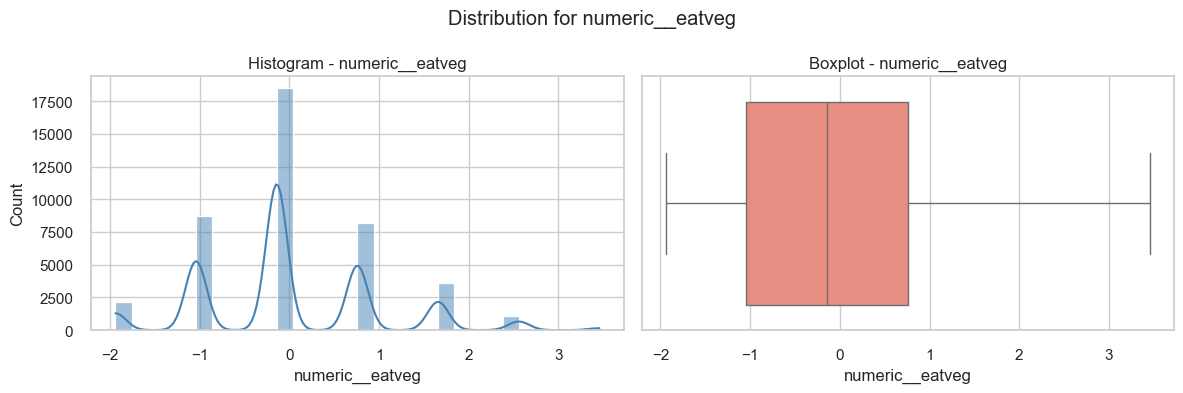

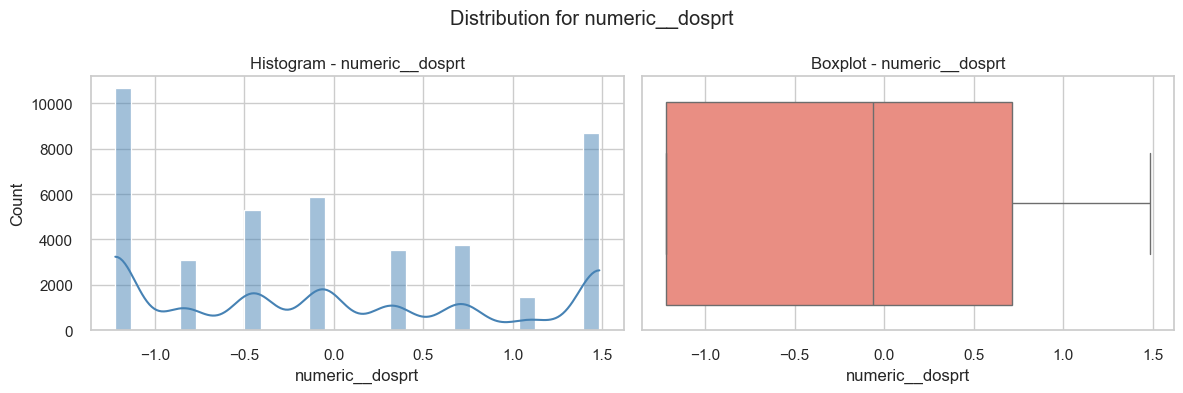

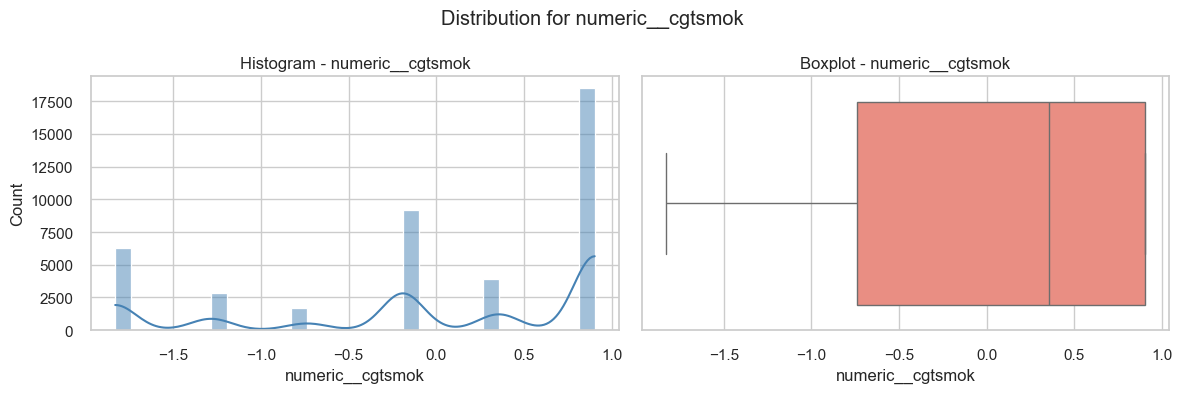

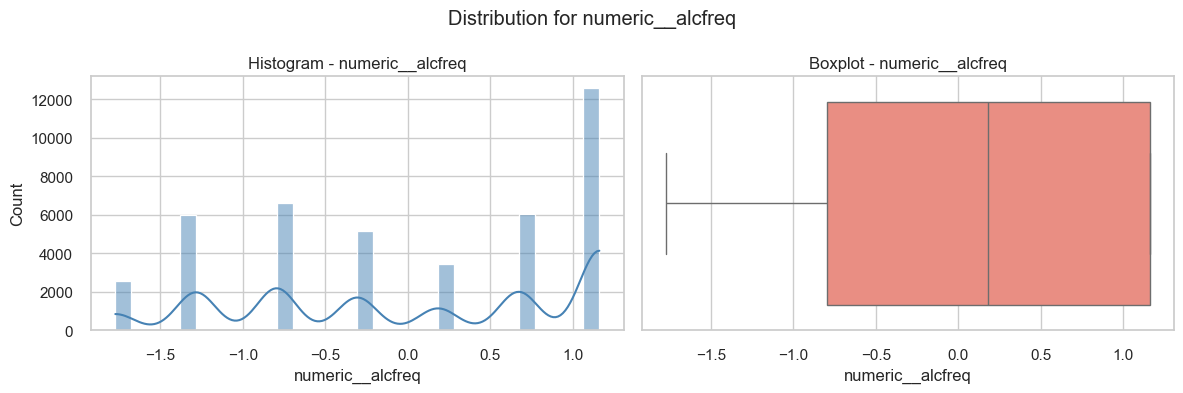

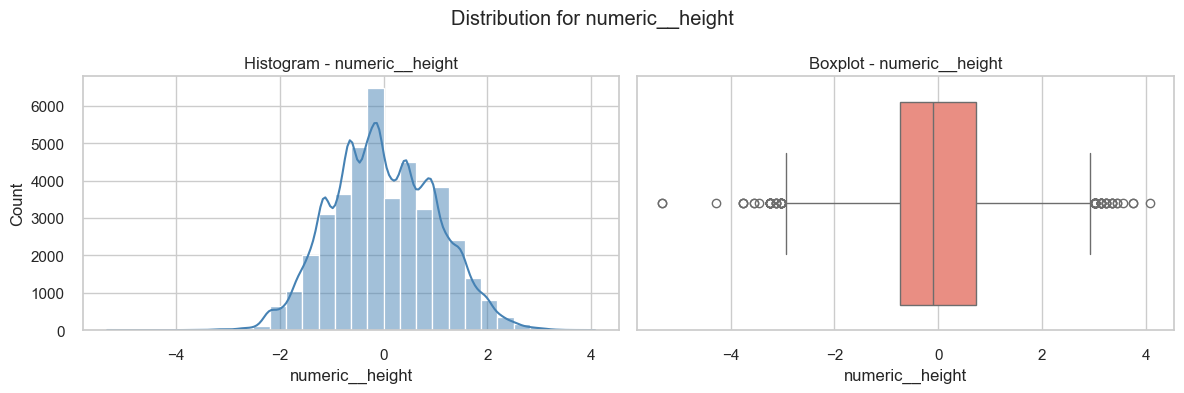

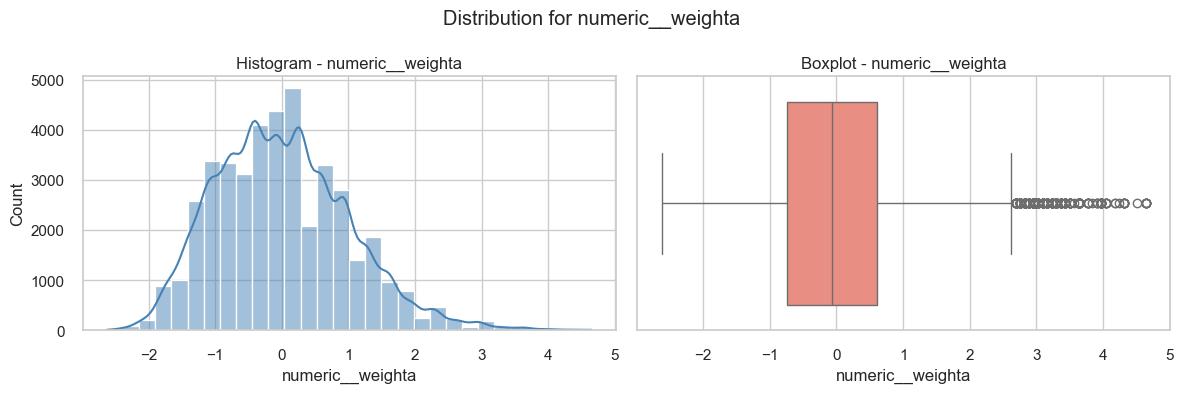

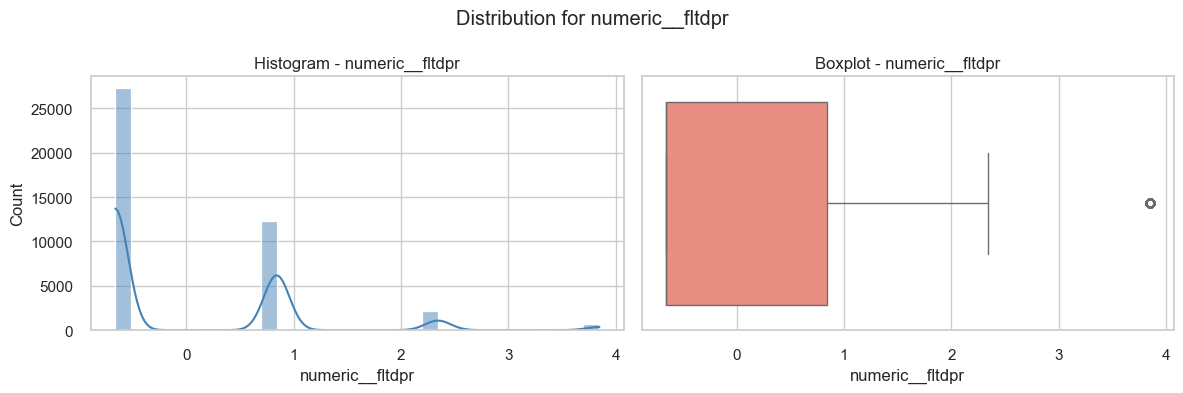

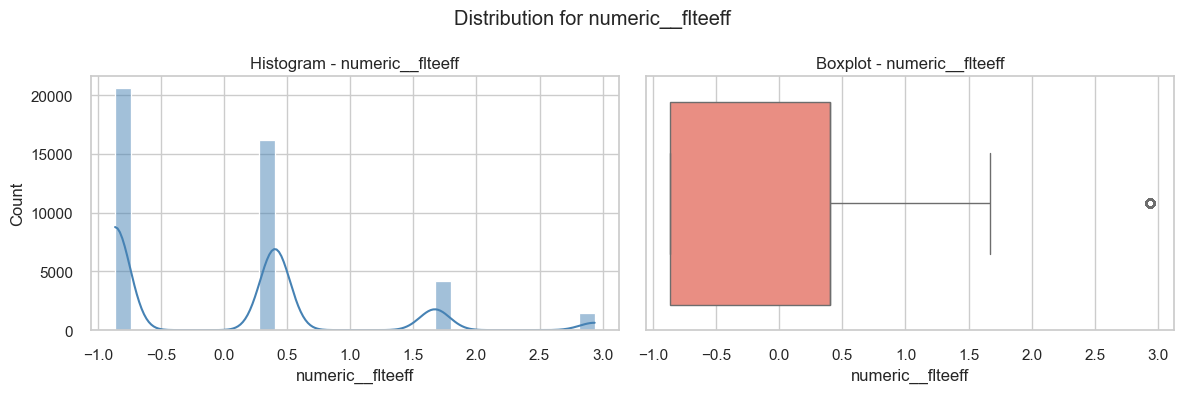

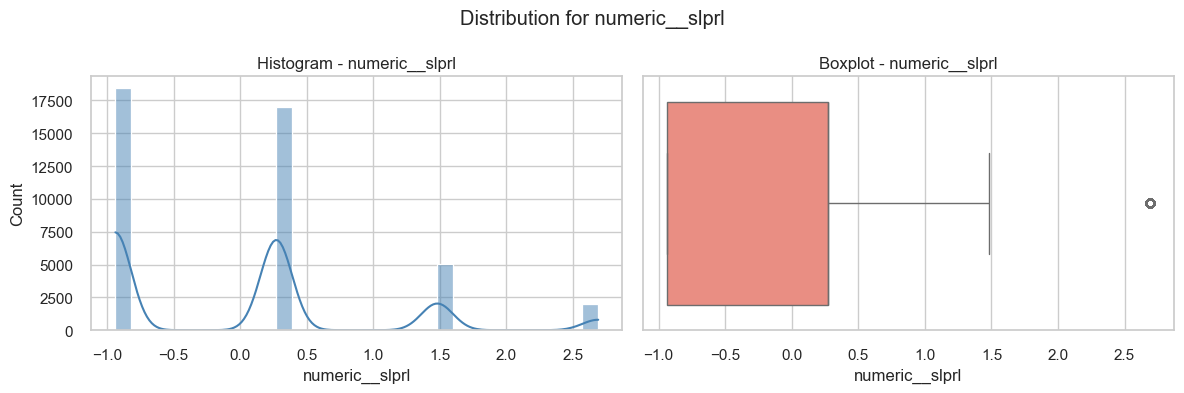

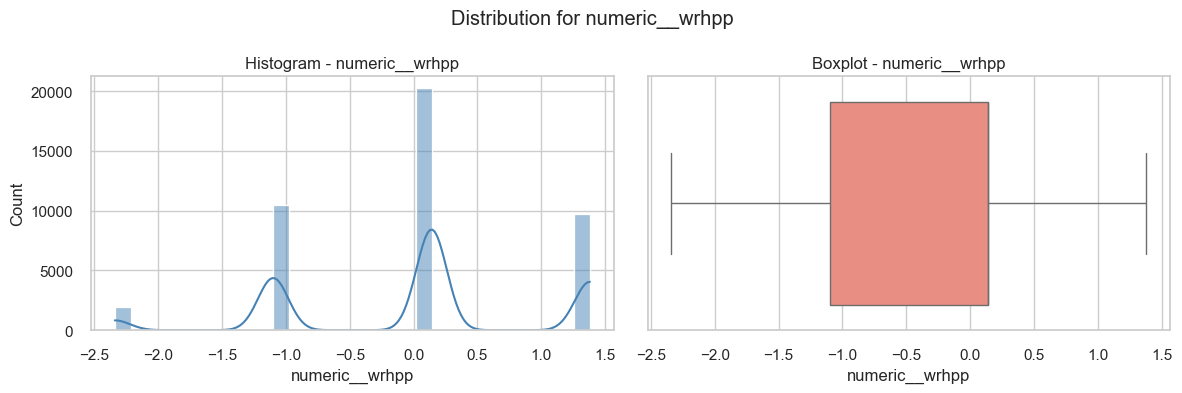

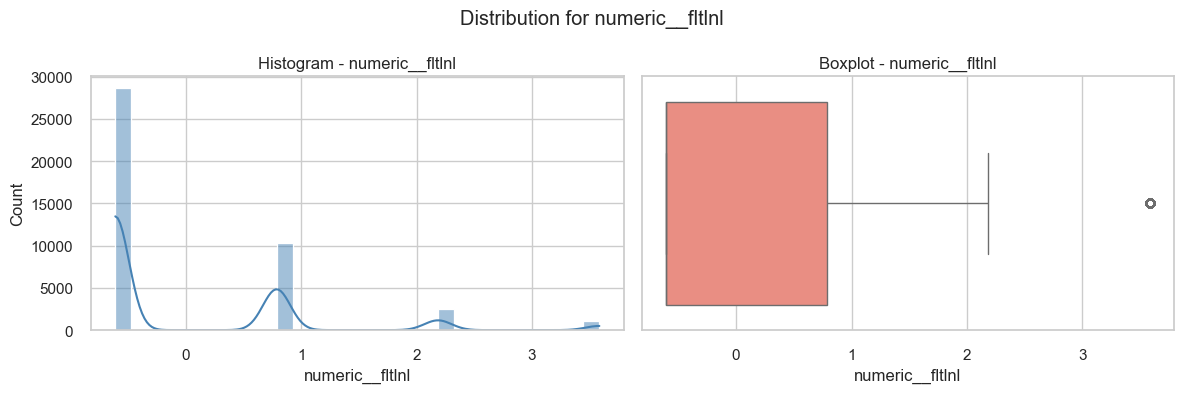

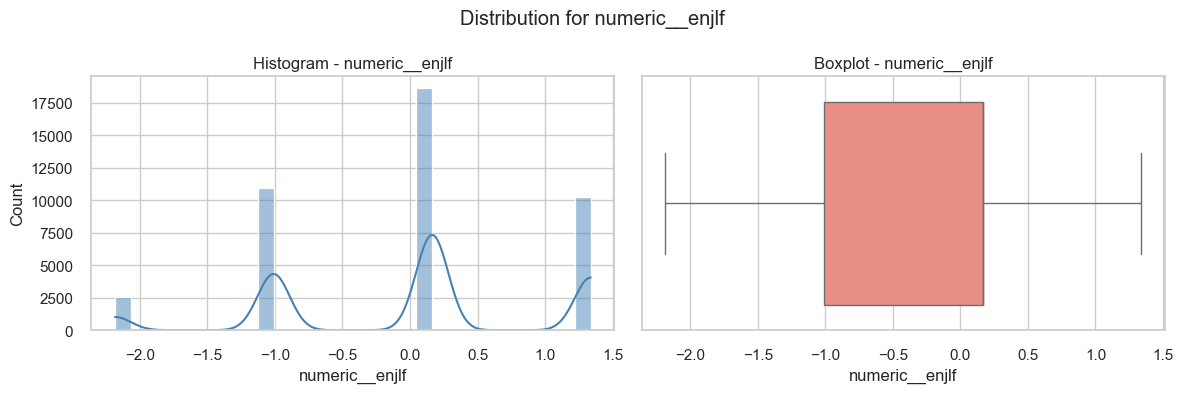

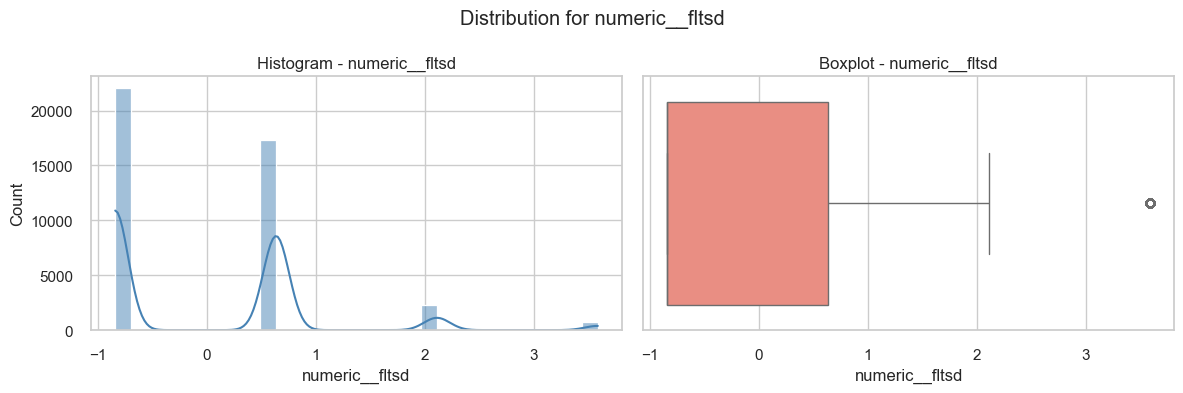

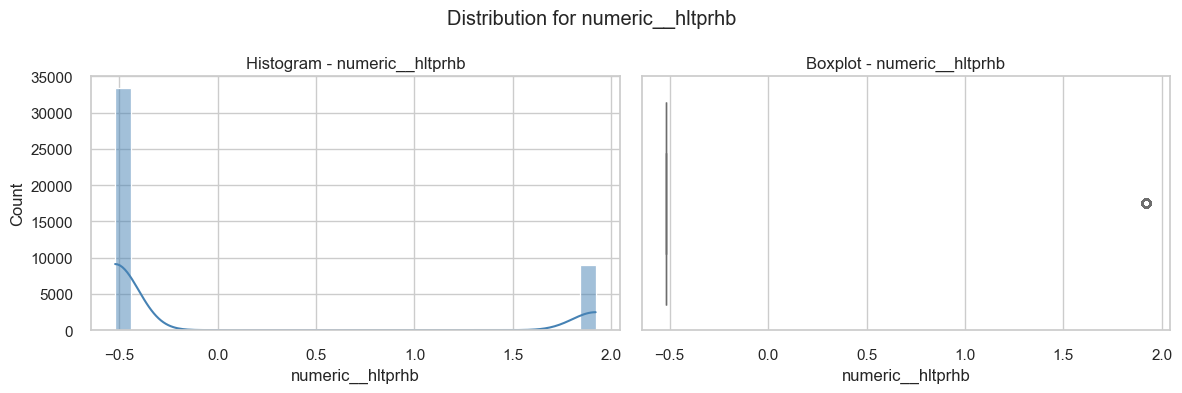

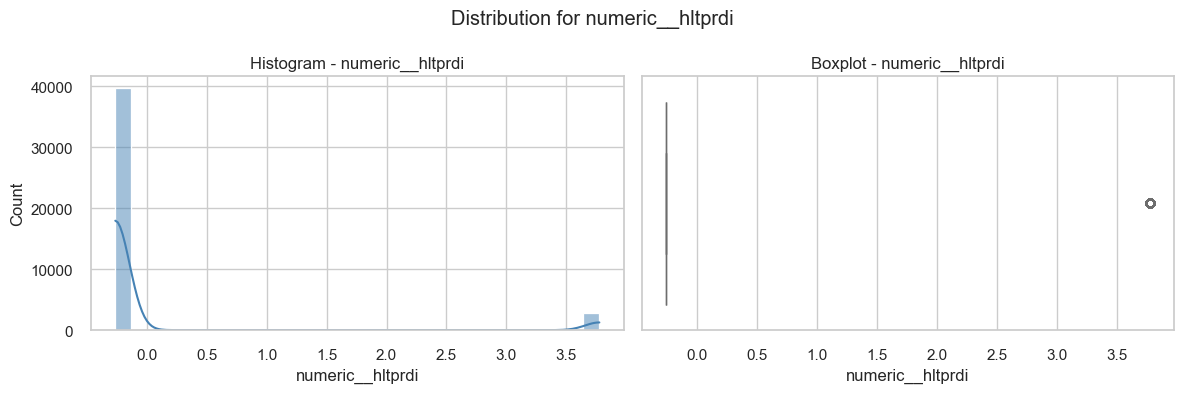

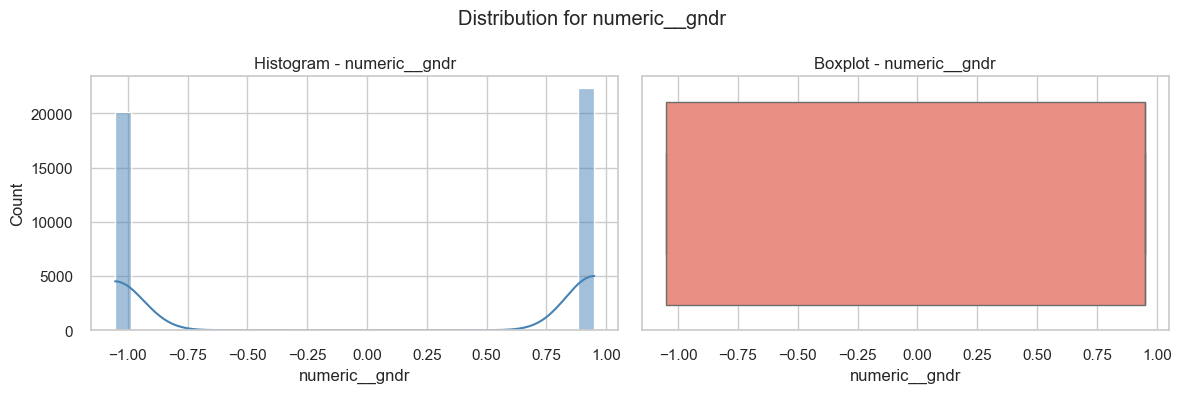

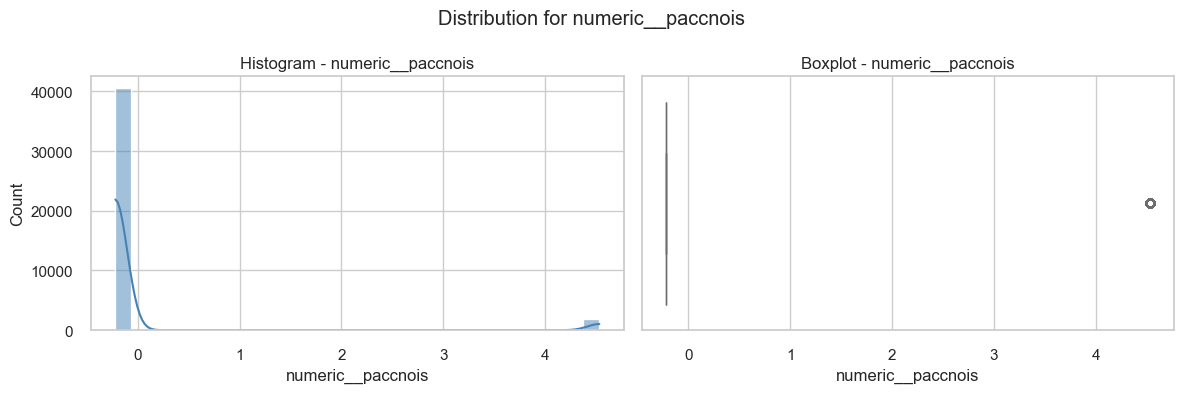

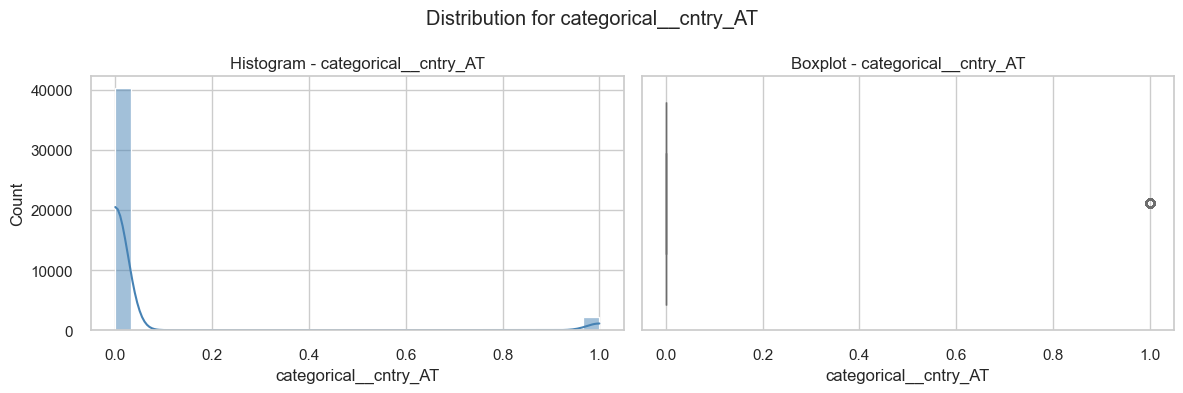

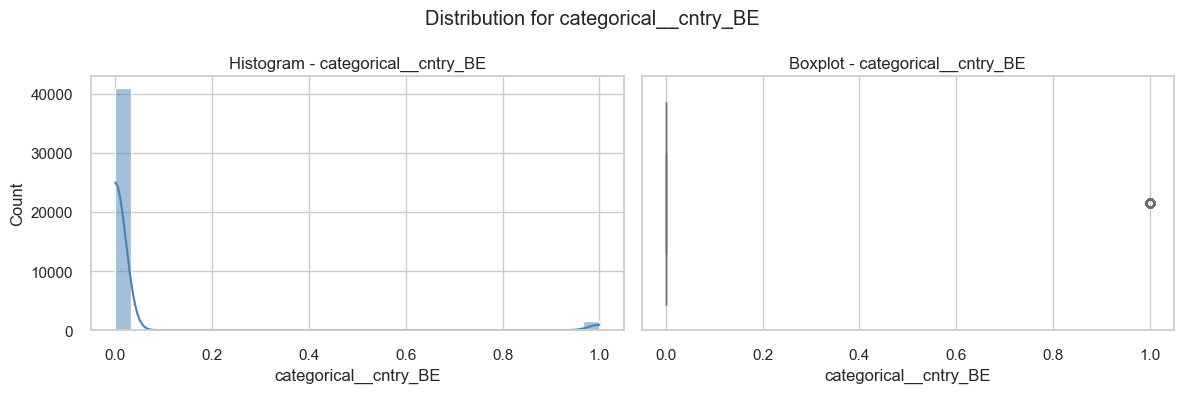

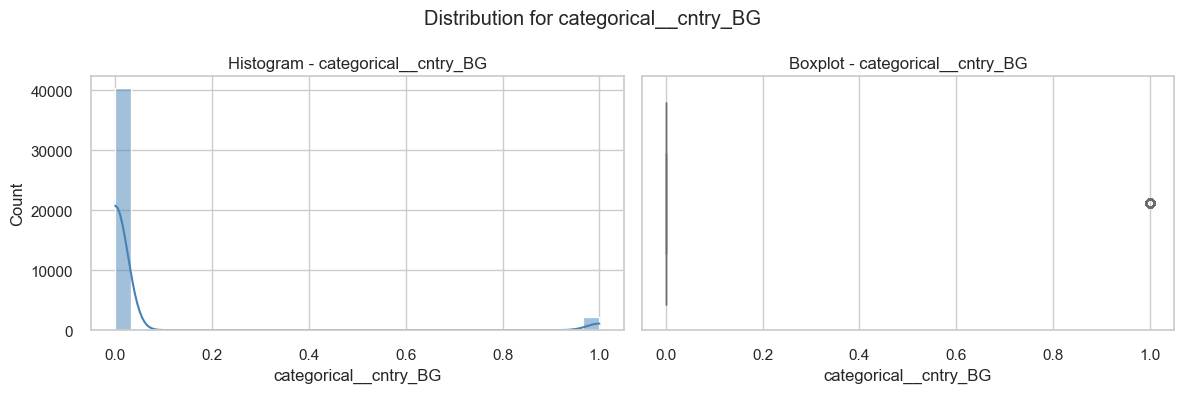

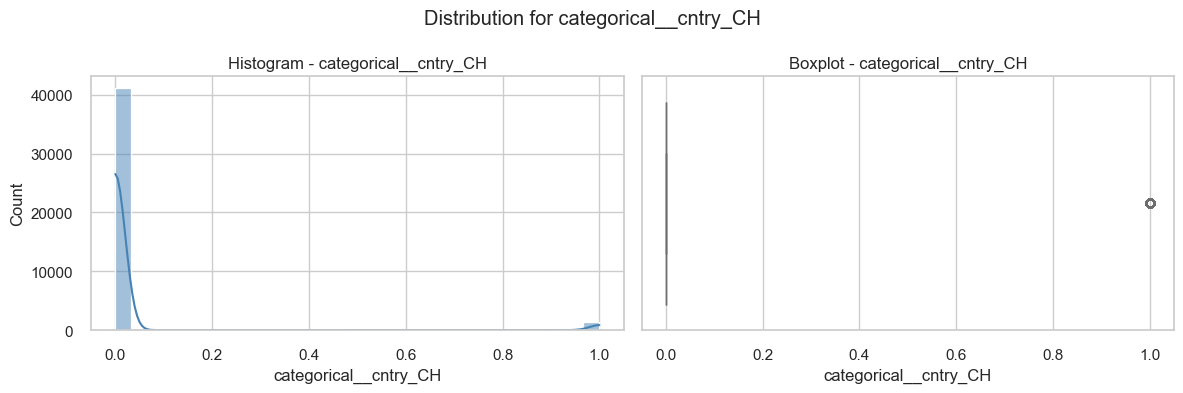

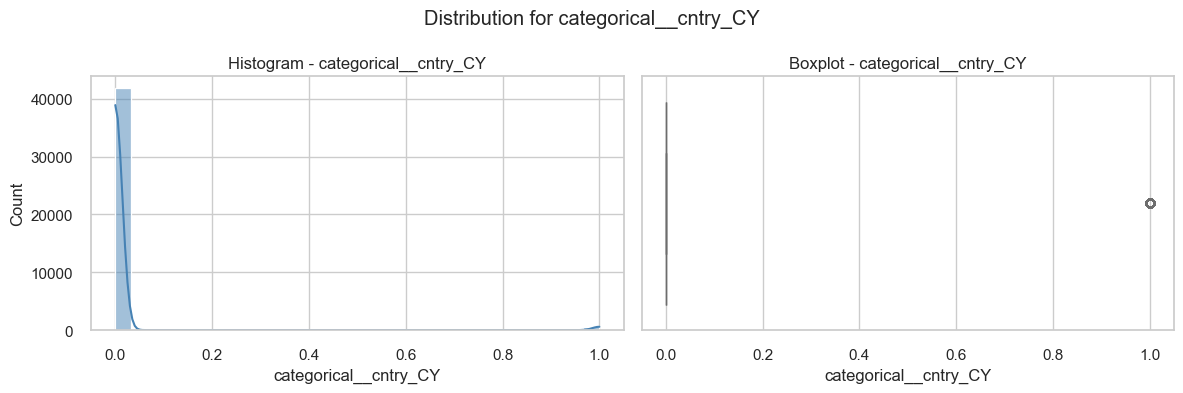

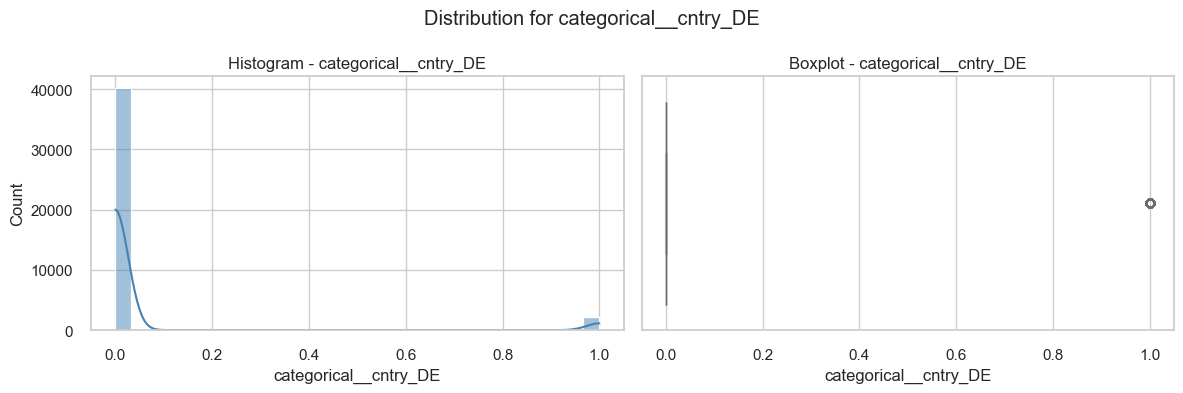

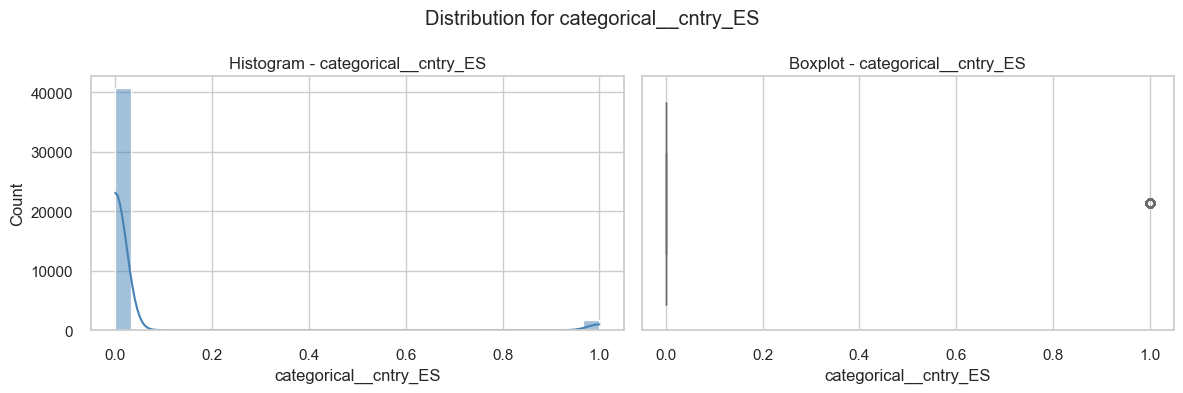

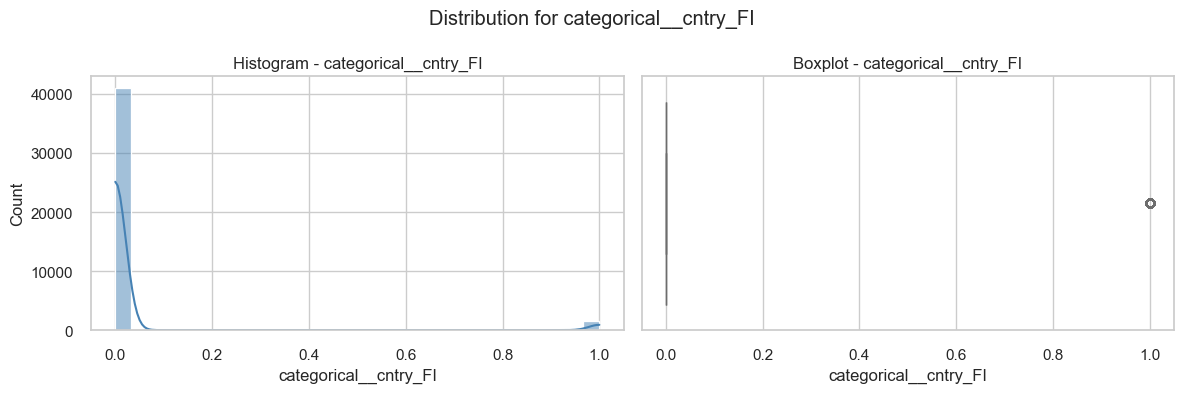

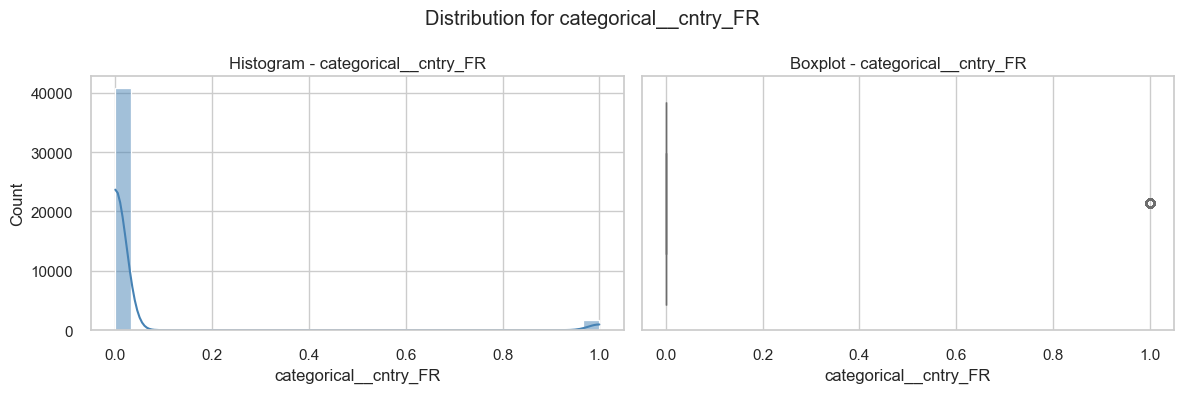

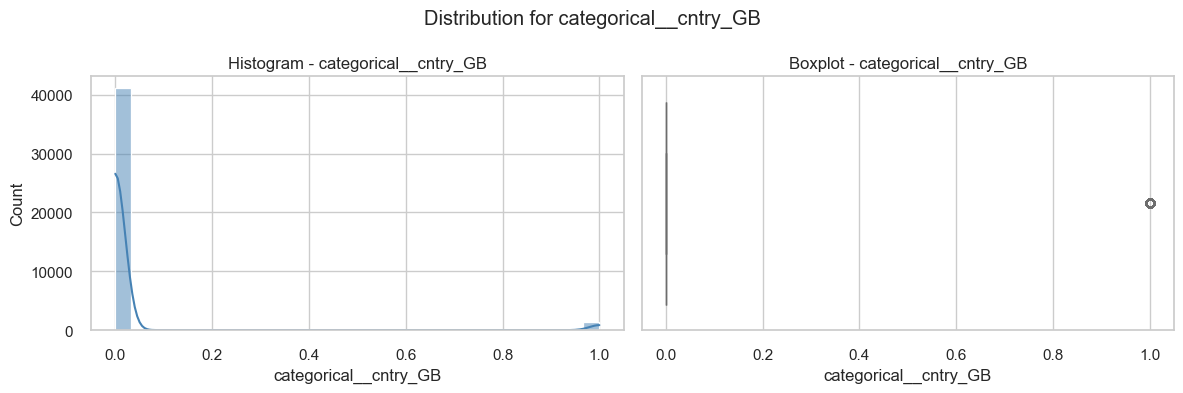

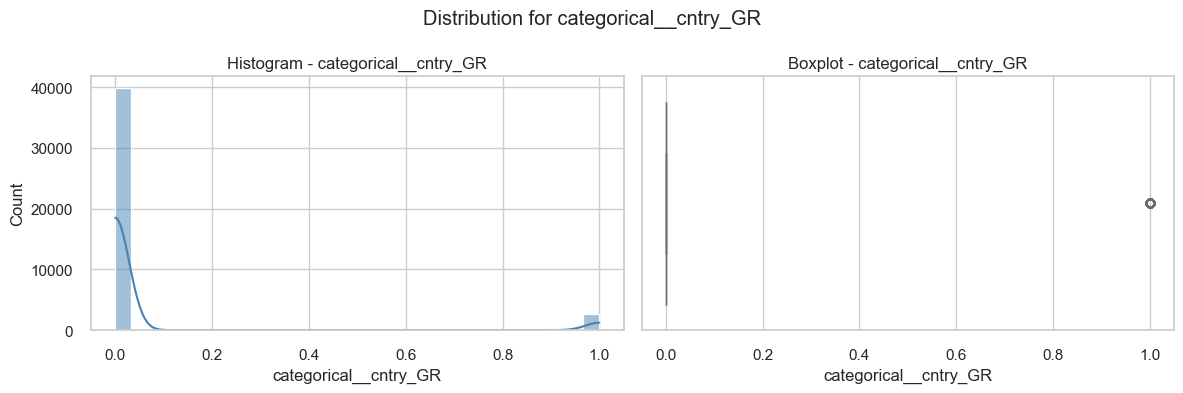

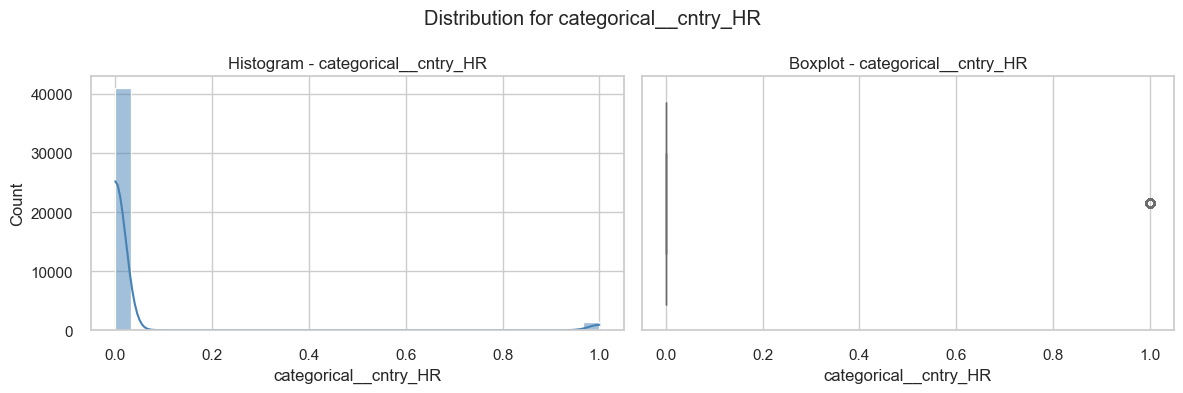

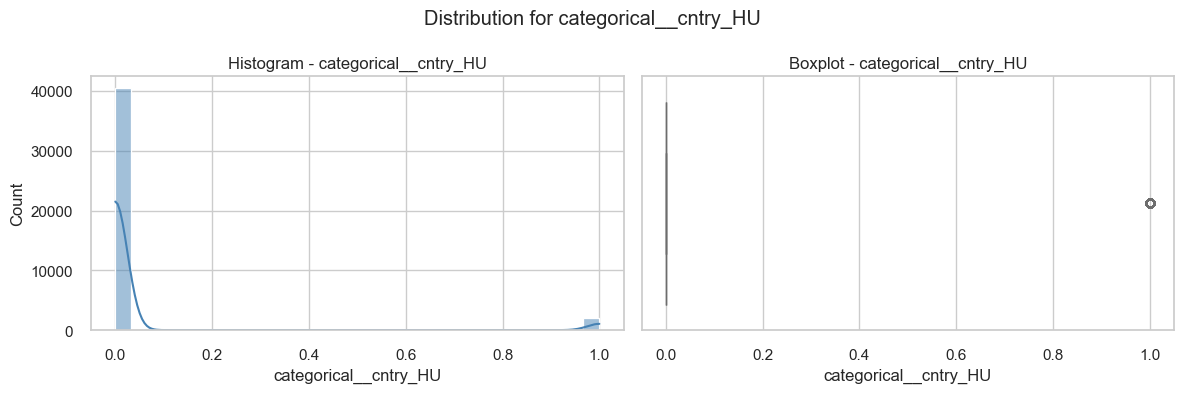

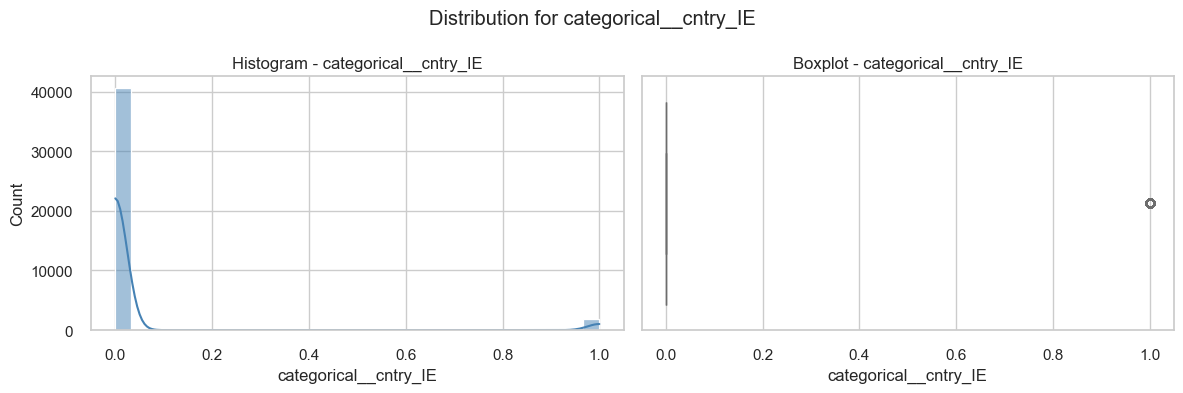

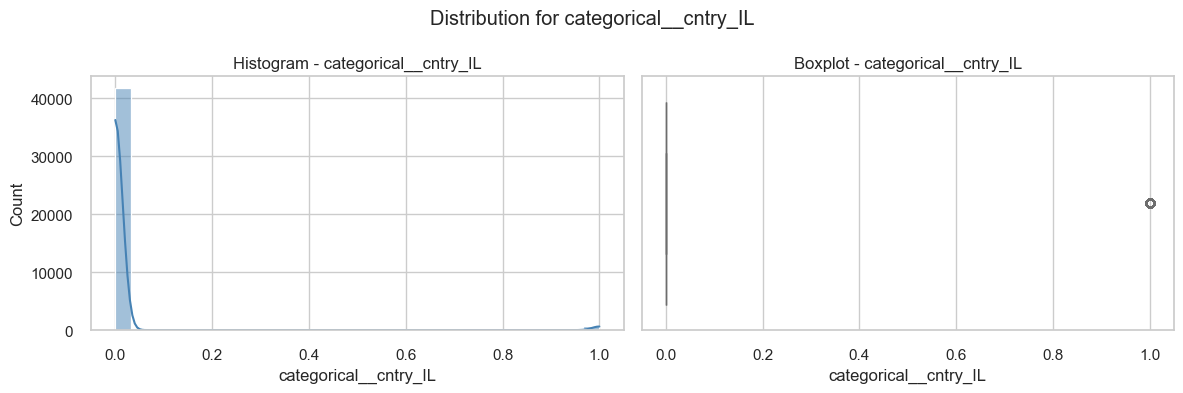

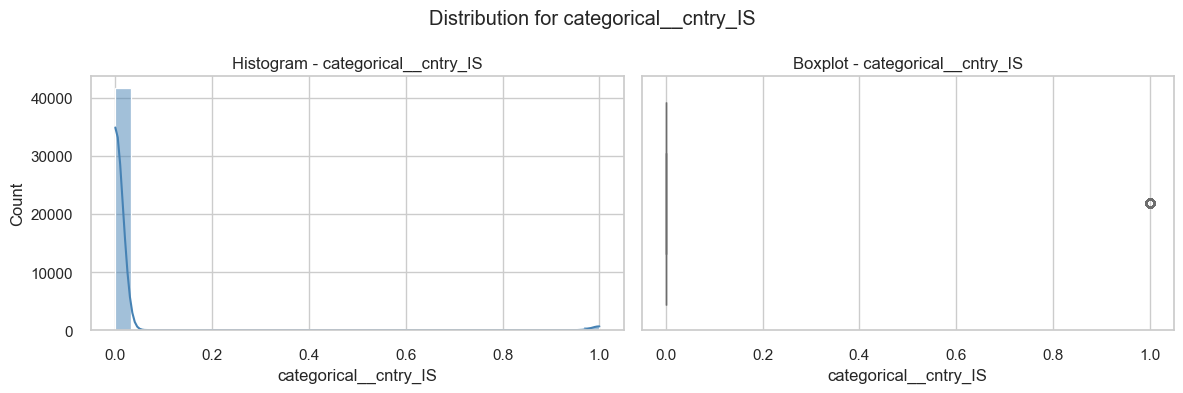

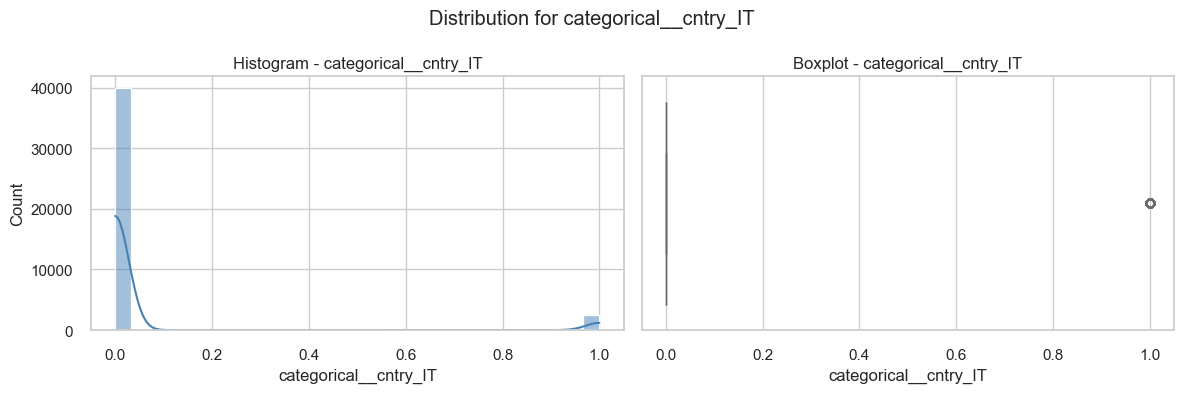

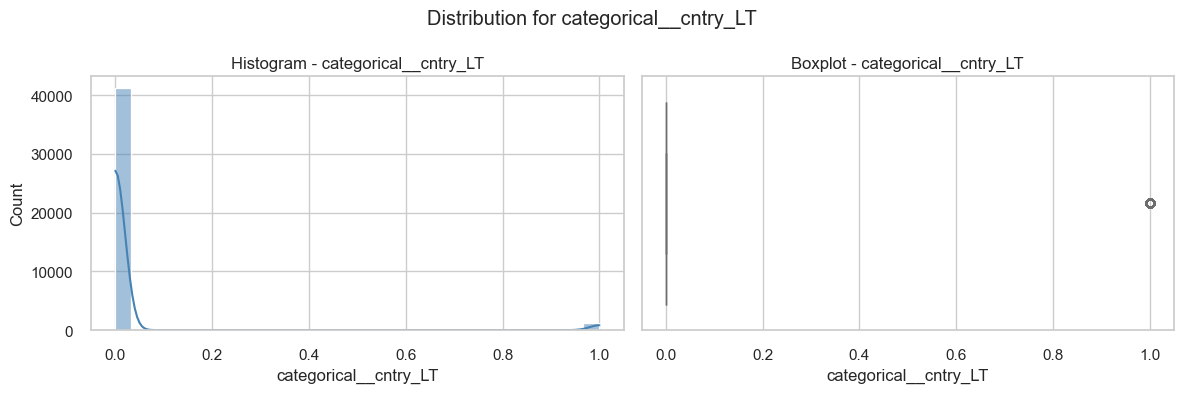

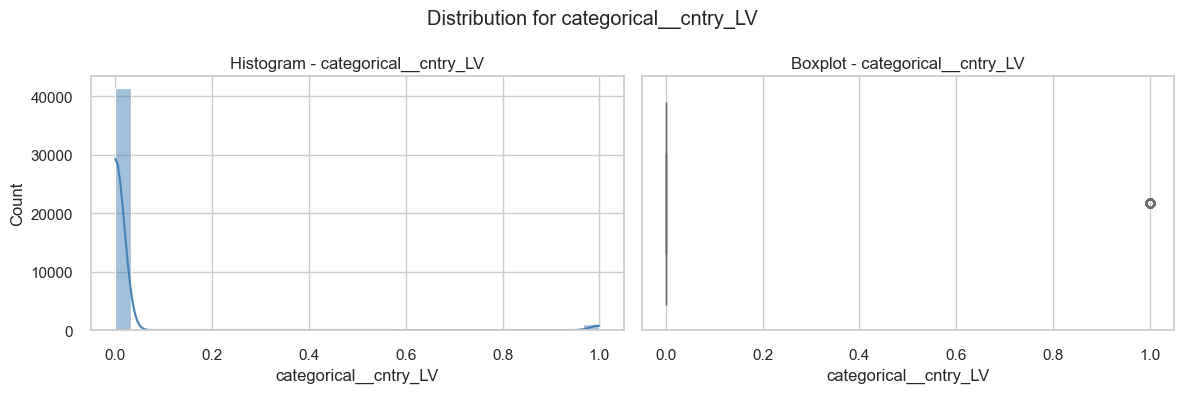

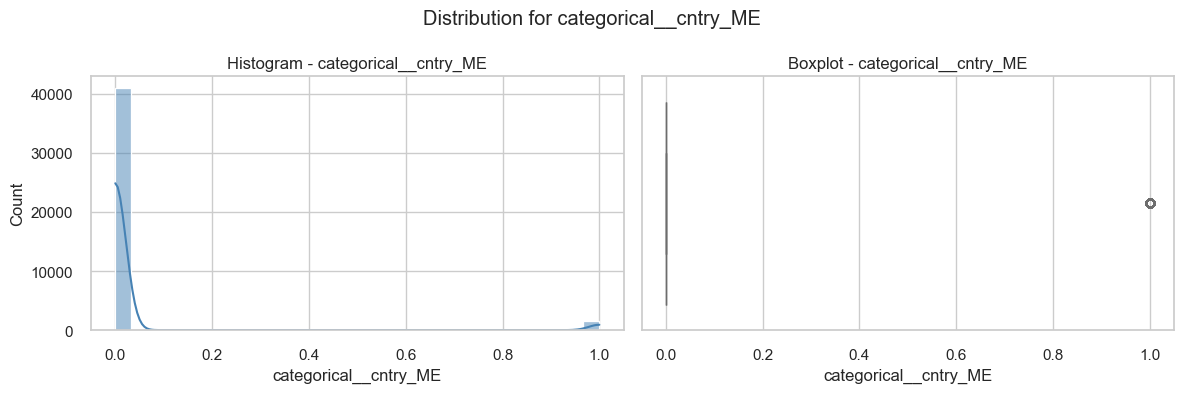

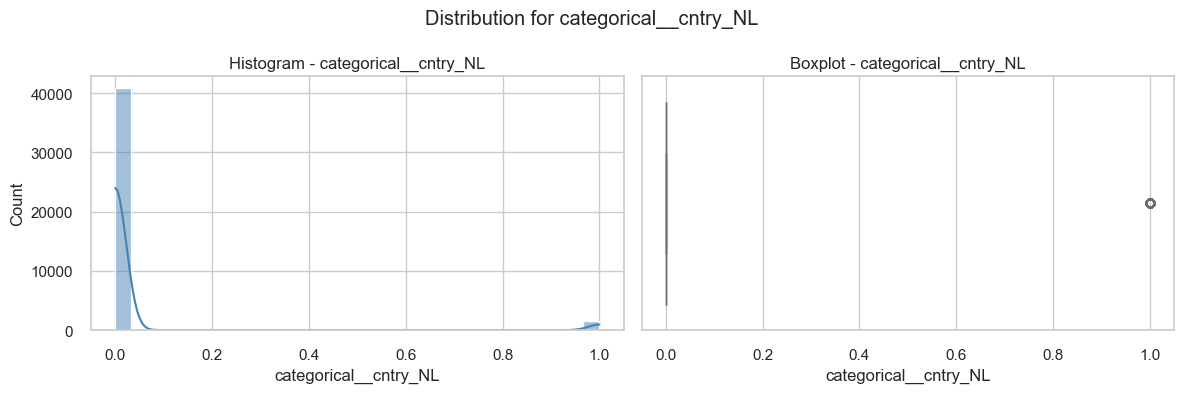

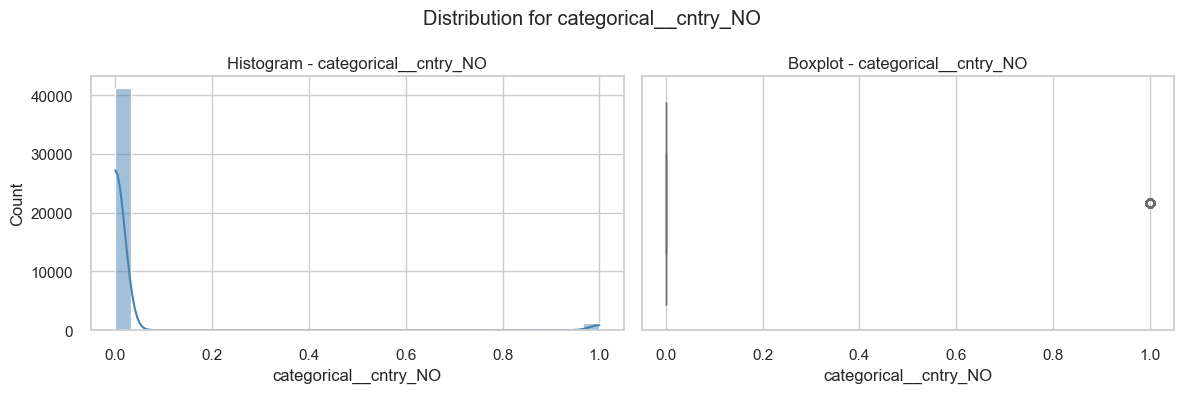

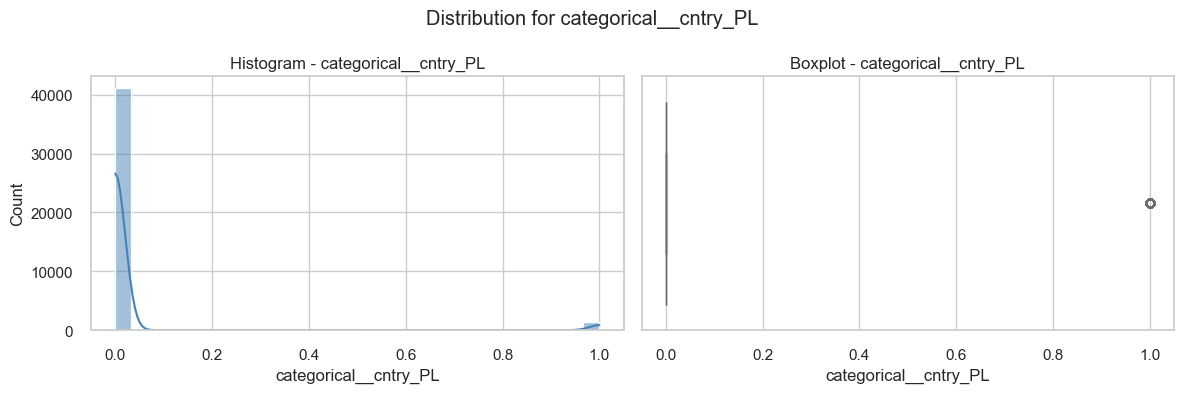

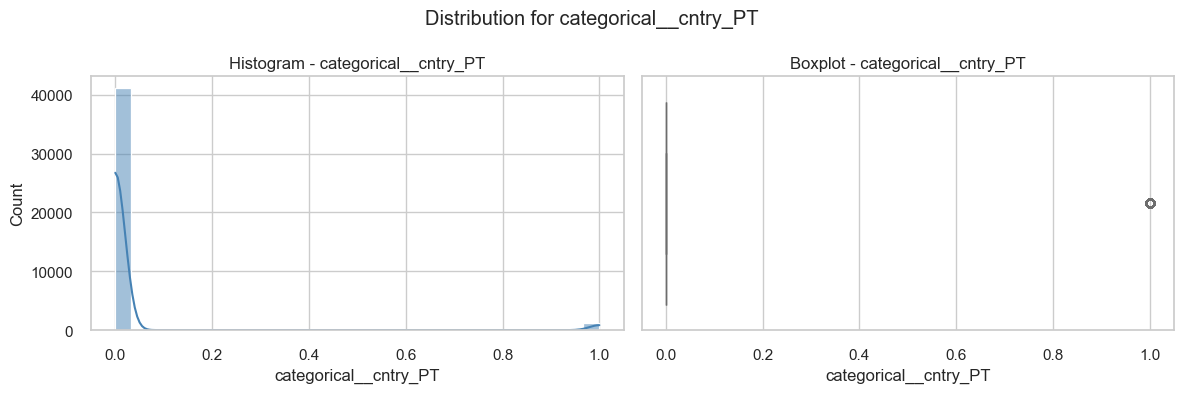

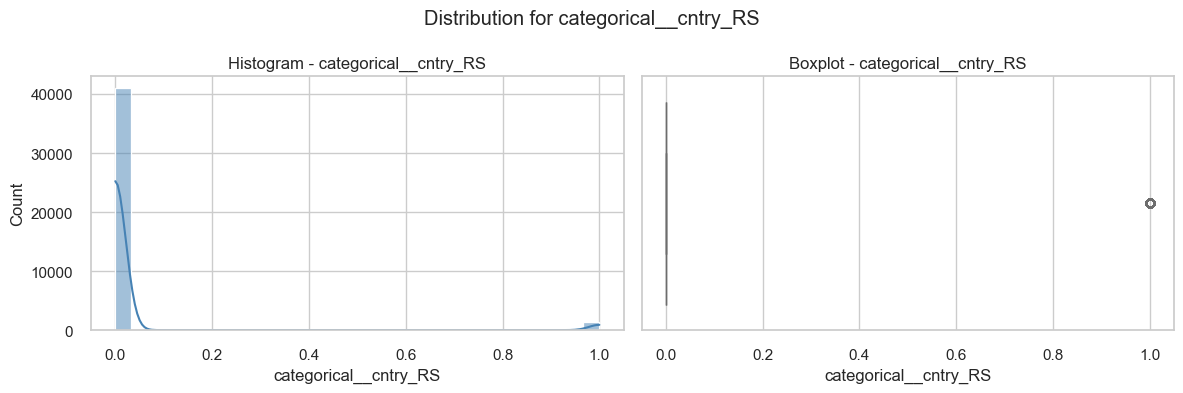

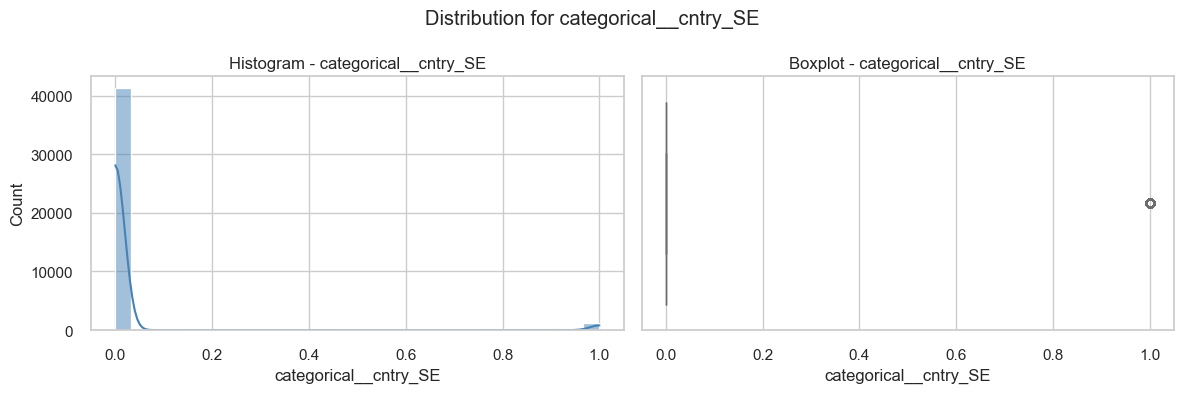

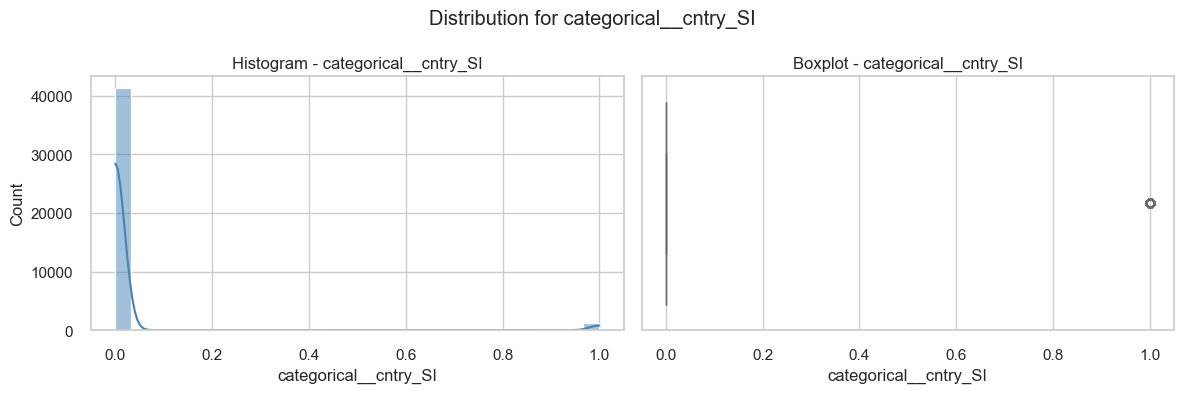

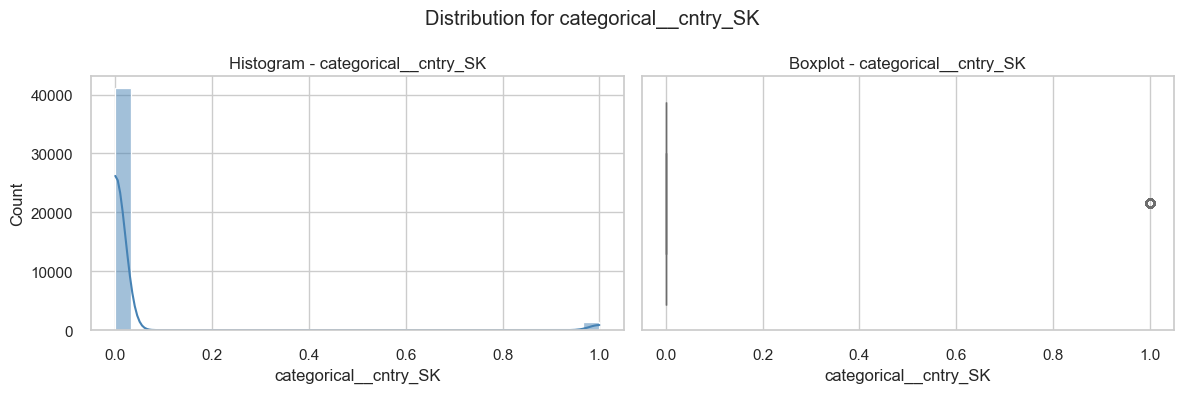

In [7]:

numeric_cols = df.drop(columns=[TARGET_COLUMN], errors='ignore').select_dtypes(include=[np.number]).columns.tolist()
print(f'Numeric features ({len(numeric_cols)}): {numeric_cols}')
for column in numeric_cols:
    series = df[column].dropna()
    if series.empty:
        continue
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(series, bins=30, kde=True, ax=axes[0], color='steelblue')
    axes[0].set_title(f'Histogram - {column}')
    axes[0].set_xlabel(column)
    sns.boxplot(x=series, ax=axes[1], color='salmon')
    axes[1].set_title(f'Boxplot - {column}')
    axes[1].set_xlabel(column)
    fig.suptitle(f'Distribution for {column}')
    fig.tight_layout()
    plot_path = PLOTS_DIR / f'{column}_distribution.png'
    fig.savefig(plot_path)
    plt.show()


### Categorical Variable Frequencies

In [8]:

categorical_cols = df.drop(columns=[TARGET_COLUMN], errors='ignore').select_dtypes(exclude=[np.number]).columns.tolist()
print(f'Categorical features ({len(categorical_cols)}): {categorical_cols}')
if categorical_cols:
    for column in categorical_cols:
        counts = df[column].value_counts().head(20)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=counts.values, y=counts.index, palette='viridis')
        plt.title(f'Top Categories - {column}')
        plt.xlabel('Frequency')
        plt.ylabel(column)
        plot_path = PLOTS_DIR / f'{column}_frequency.png'
        plt.tight_layout()
        plt.savefig(plot_path)
        plt.show()
else:
    print('No categorical variables detected.')


Categorical features (0): []
No categorical variables detected.


### Correlation Matrix and Heatmap

,numeric__happy,numeric__sclmeet,numeric__inprdsc,numeric__health,numeric__ctrlife,numeric__etfruit,numeric__eatveg,numeric__dosprt,numeric__cgtsmok,numeric__alcfreq,...,categorical__cntry_ME,categorical__cntry_NL,categorical__cntry_NO,categorical__cntry_PL,categorical__cntry_PT,categorical__cntry_RS,categorical__cntry_SE,categorical__cntry_SI,categorical__cntry_SK,hltprhc
numeric__happy,1.000000,0.224594,0.240645,-0.305330,0.434612,-0.105908,-0.128728,0.165331,0.105819,-0.084786,...,-0.097589,0.058391,0.054264,0.020262,-0.026039,-0.016710,0.034395,0.035791,-0.083294,-0.092364
numeric__sclmeet,0.224594,1.000000,0.267570,-0.176067,0.149321,-0.046219,-0.104387,0.169671,-0.000290,-0.155494,...,0.005482,0.075414,0.090294,-0.095530,0.095823,0.046815,0.064962,-0.017193,-0.021208,-0.072959
numeric__inprdsc,0.240645,0.267570,1.000000,-0.149512,0.100775,-0.067069,-0.115478,0.169951,0.062116,-0.154223,...,-0.066351,0.133306,0.065788,0.048999,-0.049042,-0.037521,0.130667,0.008010,-0.121317,-0.052597
numeric__health,-0.305330,-0.176067,-0.149512,1.000000,-0.199109,0.040659,0.075899,-0.187647,-0.030640,0.099770,...,-0.003488,-0.003892,-0.031415,0.007883,0.054608,0.046438,-0.016016,0.010133,0.055607,0.324795
numeric__ctrlife,0.434612,0.149321,0.100775,-0.199109,1.000000,-0.078752,-0.081545,0.134346,0.057392,-0.062090,...,-0.099375,-0.001936,0.052014,0.052967,-0.004233,0.007005,0.034859,0.009943,-0.018037,-0.070587
numeric__etfruit,-0.105908,-0.046219,-0.067069,0.040659,-0.078752,1.000000,0.486732,-0.109601,-0.176982,-0.051685,...,0.053020,-0.011489,0.002031,-0.017500,-0.091161,0.020100,0.033814,-0.021869,0.023510,-0.004194
numeric__eatveg,-0.128728,-0.104387,-0.115478,0.075899,-0.081545,0.486732,1.000000,-0.144090,-0.123193,0.019736,...,0.079825,-0.024211,-0.028210,-0.005691,-0.039668,-0.046443,-0.037249,-0.012275,0.059671,0.027359
numeric__dosprt,0.165331,0.169671,0.169951,-0.187647,0.134346,-0.109601,-0.144090,1.000000,0.062624,-0.095234,...,-0.063391,0.064019,0.038917,-0.031569,-0.081721,-0.009848,0.043807,0.029360,-0.016866,-0.088512
numeric__cgtsmok,0.105819,-0.000290,0.062116,-0.030640,0.057392,-0.176982,-0.123193,0.062624,1.000000,0.175585,...,-0.124918,0.026641,0.037009,-0.004276,0.052896,-0.048428,0.043643,0.013936,0.002939,0.015325
numeric__alcfreq,-0.084786,-0.155494,-0.154223,0.099770,-0.062090,-0.051685,0.019736,-0.095234,0.175585,1.000000,...,0.129903,-0.070977,-0.032639,0.037479,-0.006966,0.038496,-0.053137,-0.013398,0.024489,0.047246


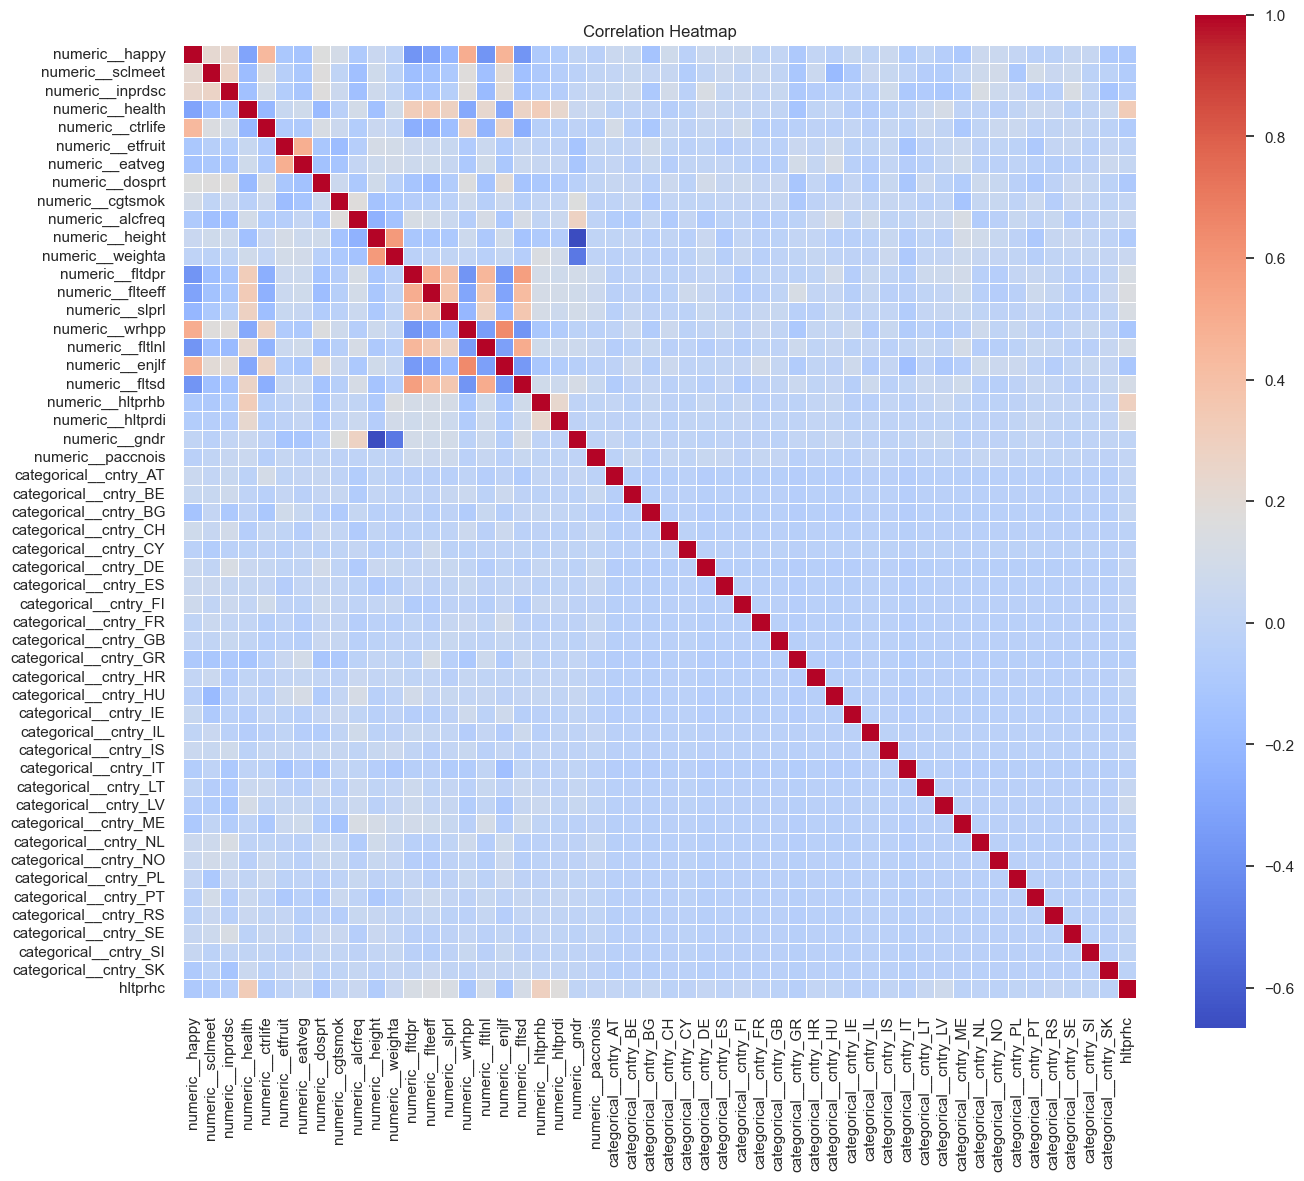

,correlation_with_target
numeric__health,0.324795
numeric__hltprhb,0.296244
numeric__hltprdi,0.174420
numeric__flteeff,0.151286
numeric__slprl,0.132530
numeric__fltdpr,0.123949
numeric__fltsd,0.110906
numeric__enjlf,-0.107390
numeric__wrhpp,-0.107328
numeric__fltlnl,0.106654


In [9]:

import pandas as pd  # reaffirm for clarity when re-running cells individually
target_corr = pd.Series(dtype=float)
if numeric_cols:
    corr = df[numeric_cols + [TARGET_COLUMN]].corr()
    display(corr)
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, square=True)
    plt.title('Correlation Heatmap')
    corr_path = PLOTS_DIR / 'correlation_heatmap.png'
    plt.tight_layout()
    plt.savefig(corr_path)
    plt.show()
    target_corr = corr[TARGET_COLUMN].drop(labels=[TARGET_COLUMN]).sort_values(key=lambda s: s.abs(), ascending=False)
    display(pd.DataFrame({'correlation_with_target': target_corr}))
else:
    print('Correlation matrix requires numeric features.')


### Multicollinearity Check (VIF)

In [10]:

def compute_vif(dataframe):
    if dataframe.shape[1] < 2:
        return pd.DataFrame()
    imputer = SimpleImputer(strategy='median')
    numeric_imputed = pd.DataFrame(
        imputer.fit_transform(dataframe), columns=dataframe.columns
    )
    vif_records = []
    for column in numeric_imputed.columns:
        y = numeric_imputed[column]
        X = numeric_imputed.drop(columns=[column])
        if X.empty:
            vif = np.nan
        else:
            model = LinearRegression()
            model.fit(X, y)
            r_squared = model.score(X, y)
            vif = np.inf if r_squared >= 1 else 1.0 / max(1 - r_squared, 1e-6)
        vif_records.append({'feature': column, 'vif': round(float(vif), 3)})
    return pd.DataFrame(vif_records)

vif_df = compute_vif(df[numeric_cols]) if numeric_cols else pd.DataFrame()
if not vif_df.empty:
    display(vif_df)
    vif_df.to_csv(METRICS_DIR / 'vif_summary.csv', index=False)
else:
    print('Not enough numeric features to compute VIF.')


,feature,vif
0,numeric__happy,1.792
1,numeric__sclmeet,1.304
2,numeric__inprdsc,1.318
3,numeric__health,1.571
4,numeric__ctrlife,1.330
5,numeric__etfruit,1.414
6,numeric__eatveg,1.415
7,numeric__dosprt,1.200
8,numeric__cgtsmok,1.149
9,numeric__alcfreq,1.274


### Outlier Summary (IQR Method)

In [11]:

iqr_records = []
for column in numeric_cols:
    series = df[column].dropna()
    if series.empty:
        continue
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_mask = (series < lower) | (series > upper)
    iqr_records.append({
        'feature': column,
        'iqr': round(iqr, 3),
        'lower_bound': round(lower, 3),
        'upper_bound': round(upper, 3),
        'outlier_count': int(outlier_mask.sum()),
        'outlier_pct': round(outlier_mask.mean() * 100, 2),
    })

iqr_df = pd.DataFrame(iqr_records)
if not iqr_df.empty:
    display(iqr_df)
    iqr_df.to_csv(METRICS_DIR / 'outlier_summary_notebook.csv', index=False)
else:
    print('No numeric features available for IQR-based outlier detection.')


,feature,iqr,lower_bound,upper_bound,outlier_count,outlier_pct
0,numeric__happy,1.087,-1.843,2.507,2828,6.67
1,numeric__sclmeet,1.261,-2.384,2.661,0,0.00
2,numeric__inprdsc,1.406,-2.614,3.011,0,0.00
3,numeric__health,2.207,-4.575,4.251,0,0.00
4,numeric__ctrlife,1.482,-2.900,3.027,478,1.13
5,numeric__etfruit,1.530,-3.232,2.888,0,0.00
6,numeric__eatveg,1.799,-3.740,3.457,0,0.00
7,numeric__dosprt,1.932,-4.118,3.610,0,0.00
8,numeric__cgtsmok,1.641,-3.199,3.365,0,0.00
9,numeric__alcfreq,1.957,-3.730,4.097,0,0.00


### EDA Summary Table

In [12]:

overall_missing_pct = round((df.isna().sum().sum() / (row_count * col_count)) * 100, 2)
class_balance_summary = '; '.join([f"{int(cls)}: {pct}%" for cls, pct in target_pct.items()])
top_corr_summary = ''
if not target_corr.empty:
    top_corr_summary = '; '.join([f"{idx + 1}. {feature} ({value:.3f})" for idx, (feature, value) in enumerate(target_corr.head(3).items())])
eda_summary = pd.DataFrame([
    {'metric': 'row_count', 'value': row_count},
    {'metric': 'column_count', 'value': col_count},
    {'metric': 'overall_missing_pct', 'value': overall_missing_pct},
    {'metric': 'class_balance', 'value': class_balance_summary},
])
if top_corr_summary:
    eda_summary = pd.concat([eda_summary, pd.DataFrame([{'metric': 'top_correlations', 'value': top_corr_summary}])], ignore_index=True)
display(eda_summary)
eda_summary.to_csv(METRICS_DIR / 'eda_summary.csv', index=False)


,metric,value
0,row_count,42377
1,column_count,52
2,overall_missing_pct,0.0
3,class_balance,0: 88.68%; 1: 11.32%
4,top_correlations,1. numeric__health (0.325); 2. numeric__hltprh...


### Summary of EDA Findings

In [13]:
from IPython.display import Markdown, display

summary_points = [
    f'Dataset contains {row_count} rows and {col_count} columns with an overall missing rate of {overall_missing_pct}%.',
    f'Class balance for hltprhc shows: {class_balance_summary}.',
]

if top_corr_summary:
    summary_points.append(f'Top correlated features with hltprhc: {top_corr_summary}.')

numeric_count = len(numeric_cols)
categorical_count = len(categorical_cols)
summary_points.append(
    f'Feature types: {numeric_count} numeric and {categorical_count} categorical features available for modeling.'
)

if 'missing_df' in globals() and not missing_df.empty:
    missing_candidates = missing_df[missing_df['missing_count'] > 0].head(3)
    if not missing_candidates.empty:
        missing_detail = '; '.join(
            f"{row.Index} ({row.missing_pct}% missing)" for row in missing_candidates.itertuples()
        )
        summary_points.append(f'Top missing-value columns: {missing_detail}.')

if not iqr_df.empty:
    top_outliers = iqr_df.sort_values(by='outlier_pct', ascending=False).head(3)
    if not top_outliers.empty:
        formatted_outliers = '; '.join(
            f"{row.feature} ({row.outlier_pct}% outliers)" for row in top_outliers.itertuples()
        )
        summary_points.append(f'Outlier check (IQR) highlights: {formatted_outliers}.')

# ✅ FIXED: Properly joined markdown string
summary_markdown = '\n'.join(f'- {point}' for point in summary_points)
display(Markdown(summary_markdown))


- Dataset contains 42377 rows and 52 columns with an overall missing rate of 0.0%.
- Class balance for hltprhc shows: 0: 88.68%; 1: 11.32%.
- Top correlated features with hltprhc: 1. numeric__health (0.325); 2. numeric__hltprhb (0.296); 3. numeric__hltprdi (0.174).
- Feature types: 51 numeric and 0 categorical features available for modeling.
- Outlier check (IQR) highlights: numeric__hltprhb (21.33% outliers); numeric__happy (6.67% outliers); numeric__hltprdi (6.55% outliers).